In [ ]:
from google.colab import files

# Unggah file kaggle.json yang berisi API key
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"inurart","key":"02e579ba07ddef9231d4fa9401f04e8c"}'}

In [ ]:
import os
import zipfile

# Membuat folder .kaggle
!mkdir -p ~/.kaggle

# Memindahkan file kaggle.json ke folder .kaggle
!mv kaggle.json ~/.kaggle/

# Memberikan permission untuk file kaggle.json
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
# Mendownload dataset dari Kaggle
!kaggle datasets download -d arthitaya/nail-dataset


Dataset URL: https://www.kaggle.com/datasets/arthitaya/nail-dataset
License(s): unknown
  0% 0.00/4.03M [00:00<?, ?B/s]
100% 4.03M/4.03M [00:00<00:00, 92.4MB/s]


In [ ]:
# Mengekstrak file ZIP
with zipfile.ZipFile("nail-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("nail_dataset")


In [ ]:
# Menampilkan isi folder nail_dataset
os.listdir('Nail')


['other',
 'onycholysis',
 'white spot',
 'terry_s nail',
 'normal',
 'beau_s line',
 'black line',
 'mees_ line',
 'clubbing']

In [ ]:
# Install TensorFlow
!pip install tensorflow

# Importing necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os


In [ ]:
# Directory to your dataset
dataset_dir = '/content/Nail'  # Adjust path if necessary

# Load dataset
train_dataset = image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,  # 80% training, 20% validation
    subset="training",
    seed=123,  # For reproducibility
    image_size=(256, 256),  # Resize images to a common size
    batch_size=32  # Adjust batch size as needed
)

validation_dataset = image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(256, 256),
    batch_size=32
)


Found 540 files belonging to 9 classes.
Using 432 files for training.
Found 540 files belonging to 9 classes.
Using 108 files for validation.


Class names: ['beau_s line', 'black line', 'clubbing', 'mees_ line', 'normal', 'onycholysis', 'other', 'terry_s nail', 'white spot']


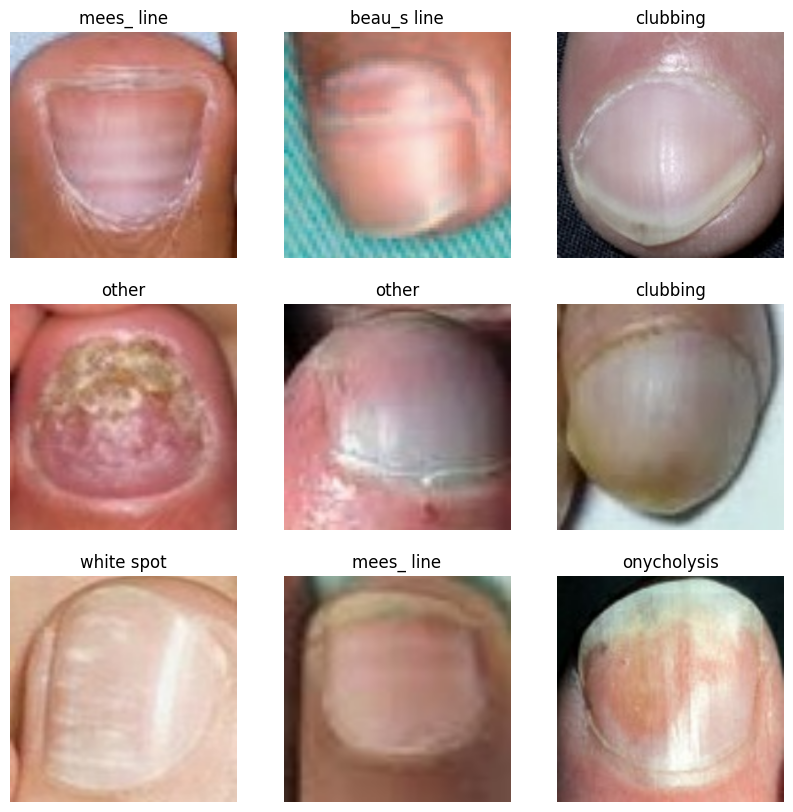

In [ ]:
class_names = train_dataset.class_names
print("Class names:", class_names)

# Visualizing a few images
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


In [ ]:
model = models.Sequential([
    layers.Rescaling(1./255),  # Normalize pixel values
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')  # Output layer for classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Training the model
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=50  # You can adjust the number of epochs
)


Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 77s 5s/step - accuracy: 0.7979 - loss: 0.6235 - val_accuracy: 0.4722 - val_loss: 2.6847
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 80s 5s/step - accuracy: 0.8223 - loss: 0.5620 - val_accuracy: 0.4630 - val_loss: 2.5558
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 83s 5s/step - accuracy: 0.8175 - loss: 0.5404 - val_accuracy: 0.4537 - val_loss: 2.3917
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 81s 5s/step - accuracy: 0.8585 - loss: 0.4502 - val_accuracy: 0.6019 - val_loss: 2.2720
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 82s 5s/step - accuracy: 0.8728 - loss: 0.3705 - val_accuracy: 0.4630 - val_loss: 3.4872
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 81s 6s/step - accuracy: 0.9203 - loss: 0.2306 - val_accuracy: 0.5278 - val_loss: 2.6983
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 76s 5s/step - accuracy: 0.9221 - loss: 0.2744 - val_accuracy: 0.4352 - val_loss: 3.3304
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 82s 5s/step - accuracy: 0.9240 - loss: 0.3186 - val_accuracy: 0.4907 - val_loss:

4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.5455 - loss: 5.7885
Validation accuracy:  0.5277777910232544


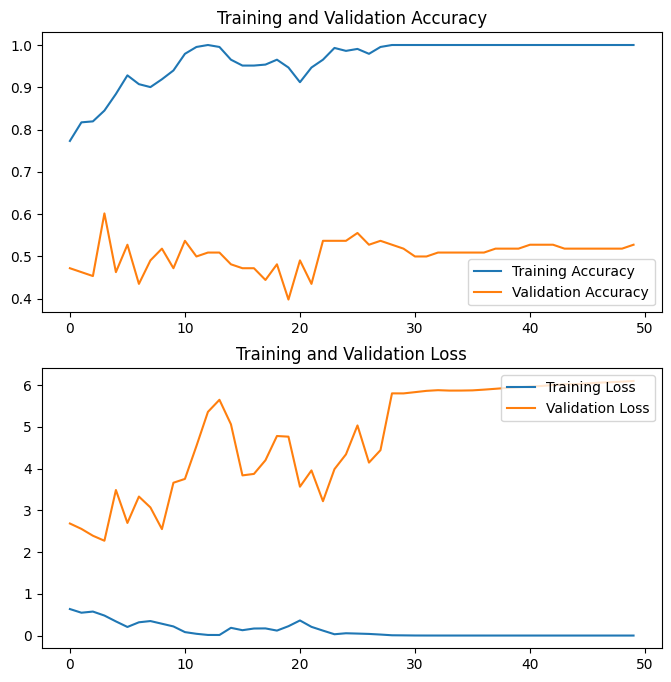

In [ ]:
# Evaluate the model
val_loss, val_acc = model.evaluate(validation_dataset)
print("Validation accuracy: ", val_acc)

# Plot training & validation accuracy values
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
# Save the trained model
model.save('nail_classification_model.keras')


In [ ]:
# Load and preprocess a new image
img = tf.keras.utils.load_img('/content/Nail/terry_s nail/terry (13).jpg', target_size=(256, 256))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create a batch

# Make predictions
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(f"This image most likely belongs to {class_names[np.argmax(score)]} with a {100 * np.max(score):.2f} percent confidence.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
This image most likely belongs to terry_s nail with a 25.36 percent confidence.
